In [6]:
import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
from keras.preprocessing import image

In [7]:
#Path to the directory where the subdirectories (classes= biomes) are stored
path = Path("C:/Users/ivali/OneDrive - Aalto University/ML_projekti_data")
#lists all subdirectories in directory = classes 
dirs = path.glob("*") 

#dictionary that maps labels
labels_dictionary = {
    "badlands": 1,
    "bamboo_jungle": 2,
    "birch_forest": 3,
    "cherry_grove": 4,
    "dark_forest": 5,
    "desert": 6,
    "flower_forest": 7,
    "forest": 8,
    "frozen_peaks": 9,
    "grove": 10,
    "ice_spikes": 11,
    "jagged_peaks": 12,
    "jungle": 13,
    "mangrove_swamp": 14,
    "meadow": 15,
    "mushroom_fields": 16,
    "old_growth_pine_taiga": 17,
    "plains": 18,
    "savannah": 19,
    "snowy_plains": 20,
    "snowy_slopes": 21,
    "stony_peaks": 22,
    "swamp": 23,
    "taiga": 24
}

image_data = []
labels = []

In [9]:
# iterate trough all folders so all classes
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][len("biome_"):]
    image_count = 0
    
    # iterate through all datapoints (all images)
    for img_path in folder_dir.glob("*.jpg"):
        if image_count >= 1000:  # break at 1000 images
            break
            
        img = image.load_img(img_path) # load
        img_cropped = image.smart_resize(img, (64,64)) # crop to 64x64 
        img_array = image.img_to_array(img_cropped) # convert to numPy array
        
        image_data.append(img_array) # arrays are all gathered to one list
        labels.append(labels_dictionary[label]) # label appended to corresponding place in list of labels
        image_count += 1
        
    print(f"Loaded {image_count} images for class: {label}") # should return 1000 images for each label

print("Data loading complete.") # indicate that loading is complete 

Data loading complete.


Number of images: 24000
Number of labels: 24000
Shape of first image: (64, 64, 3)


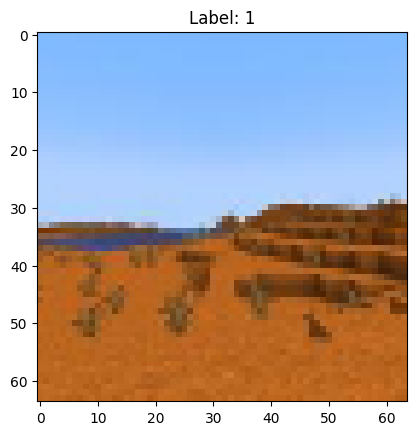

In [10]:
# summary of data
print(f"Number of images: {len(image_data)}") # both images and labels should return 24,000 because we have 24,000 images and each of them is labeled
print(f"Number of labels: {len(labels)}")
print(f"Shape of first image: {image_data[0].shape}") # shape of image, 64x64x3 because of pixel dimensions and RGB values

# Display first image for funsies
plt.imshow(np.uint8(image_data[0]))
plt.title(f"Label: {labels[0]}")
plt.show()

In [11]:
np.save("image_data64.npy", image_data)
np.save("labels64.npy", labels)